# Crypto Website API Automation

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f576f549-c589-4c38-8031-1d56b93ef09a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [5]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = pd.json_normalize(data["data"])
df["timestamp"] = pd.to_datetime("now")
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11115,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971458e+07,1.971458e+07,False,NaN,1,NaN,NaN,None,2024-06-20T09:18:00.000Z,65609.684661,1.938066e+10,-43.7264,-0.161474,0.675696,-2.798599,-7.637657,1.111132,-0.584293,1.293467e+12,54.0229,1.377803e+12,None,2024-06-20T09:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
1,1027,Ethereum,ETH,ethereum,9073,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.222752e+08,1.222752e+08,True,NaN,2,NaN,NaN,None,2024-06-20T09:17:00.000Z,3584.364396,1.388505e+10,-29.5721,-0.438437,1.347932,2.532830,-2.205545,13.083212,2.783518,4.382789e+11,18.2967,4.382789e+11,None,2024-06-20T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
2,825,Tether USDt,USDT,tether,89070,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.126061e+11,1.160845e+11,True,NaN,3,NaN,NaN,None,2024-06-20T09:17:00.000Z,0.999541,4.458560e+10,-33.8868,0.000905,-0.001782,-0.045937,-0.016078,-0.077676,-0.045014,1.125543e+11,4.7009,1.160312e+11,None,2024-06-20T09:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-20 14:49:51.610308
3,1839,BNB,BNB,bnb,2183,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475838e+08,1.475838e+08,False,NaN,4,NaN,NaN,None,2024-06-20T09:17:00.000Z,602.569302,1.746761e+09,-12.4014,-0.186863,0.553448,-0.510719,-2.931670,3.839911,3.379607,8.892949e+10,3.7125,8.892949e+10,None,2024-06-20T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
4,5426,Solana,SOL,solana,690,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.618975e+08,5.784642e+08,True,NaN,5,NaN,NaN,None,2024-06-20T09:17:00.000Z,137.245290,2.189881e+09,-28.0614,0.263261,-0.983948,-9.439577,-24.429837,-9.684022,-22.840387,6.339325e+10,2.6465,7.939149e+10,None,2024-06-20T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
5,3408,USDC,USDC,usd-coin,19803,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.279620e+10,3.279620e+10,False,NaN,6,NaN,NaN,None,2024-06-20T09:17:00.000Z,0.999939,4.158619e+09,-35.3422,-0.007981,0.003275,-0.015498,0.016140,0.002523,-0.002709,3.279421e+10,1.3691,3.279421e+10,None,2024-06-20T09:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-20 14:49:51.610308
6,52,XRP,XRP,xrp,1342,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.557046e+10,9.998753e+10,False,NaN,7,NaN,NaN,None,2024-06-20T09:18:00.000Z,0.497739,9.667552e+08,-33.0050,-0.218234,1.422657,2.138526,-8.545205,-6.670090,-21.349148,2.765960e+10,1.1554,4.977392e+10,None,2024-06-20T09:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
7,74,Dogecoin,DOGE,dogecoin,1009,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.447850e+11,1.447850e+11,True,NaN,8,NaN,NaN,None,2024-06-20T09:18:00.000Z,0.125646,6.222772e+08,-34.3840,0.150390,0.664782,-12.749466,-23.217884,-22.427936,-21.932119,1.819171e+10,0.7596,1.819171e+10,None,2024-06-20T09:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
8,11419,Toncoin,TON,toncoin,430,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,

In [9]:
def apiRunner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f576f549-c589-4c38-8031-1d56b93ef09a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    dfT = pd.json_normalize(data["data"])
    dfT["timestamp"] = pd.to_datetime("now")
    df_append = pd.DataFrame(dfT)
    df = pd.concat([df,df_append])

In [11]:
import os
from time import time
from time import sleep

for i in range(333):
    apiRunner()
    print("API Runner Completed")
    sleep(60)
exit()

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11115,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971458e+07,1.971458e+07,False,NaN,1,NaN,NaN,None,2024-06-20T09:18:00.000Z,65609.684661,1.938066e+10,-43.7264,-0.161474,0.675696,-2.798599,-7.637657,1.111132,-0.584293,1.293467e+12,54.0229,1.377803e+12,None,2024-06-20T09:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
1,1027,Ethereum,ETH,ethereum,9073,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.222752e+08,1.222752e+08,True,NaN,2,NaN,NaN,None,2024-06-20T09:17:00.000Z,3584.364396,1.388505e+10,-29.5721,-0.438437,1.347932,2.532830,-2.205545,13.083212,2.783518,4.382789e+11,18.2967,4.382789e+11,None,2024-06-20T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
2,825,Tether USDt,USDT,tether,89070,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.126061e+11,1.160845e+11,True,NaN,3,NaN,NaN,None,2024-06-20T09:17:00.000Z,0.999541,4.458560e+10,-33.8868,0.000905,-0.001782,-0.045937,-0.016078,-0.077676,-0.045014,1.125543e+11,4.7009,1.160312e+11,None,2024-06-20T09:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-20 14:49:51.610308
3,1839,BNB,BNB,bnb,2183,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475838e+08,1.475838e+08,False,NaN,4,NaN,NaN,None,2024-06-20T09:17:00.000Z,602.569302,1.746761e+09,-12.4014,-0.186863,0.553448,-0.510719,-2.931670,3.839911,3.379607,8.892949e+10,3.7125,8.892949e+10,None,2024-06-20T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
4,5426,Solana,SOL,solana,690,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.618975e+08,5.784642e+08,True,NaN,5,NaN,NaN,None,2024-06-20T09:17:00.000Z,137.245290,2.189881e+09,-28.0614,0.263261,-0.983948,-9.439577,-24.429837,-9.684022,-22.840387,6.339325e+10,2.6465,7.939149e+10,None,2024-06-20T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
5,3408,USDC,USDC,usd-coin,19803,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.279620e+10,3.279620e+10,False,NaN,6,NaN,NaN,None,2024-06-20T09:17:00.000Z,0.999939,4.158619e+09,-35.3422,-0.007981,0.003275,-0.015498,0.016140,0.002523,-0.002709,3.279421e+10,1.3691,3.279421e+10,None,2024-06-20T09:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-20 14:49:51.610308
6,52,XRP,XRP,xrp,1342,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.557046e+10,9.998753e+10,False,NaN,7,NaN,NaN,None,2024-06-20T09:18:00.000Z,0.497739,9.667552e+08,-33.0050,-0.218234,1.422657,2.138526,-8.545205,-6.670090,-21.349148,2.765960e+10,1.1554,4.977392e+10,None,2024-06-20T09:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
7,74,Dogecoin,DOGE,dogecoin,1009,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.447850e+11,1.447850e+11,True,NaN,8,NaN,NaN,None,2024-06-20T09:18:00.000Z,0.125646,6.222772e+08,-34.3840,0.150390,0.664782,-12.749466,-23.217884,-22.427936,-21.932119,1.819171e+10,0.7596,1.819171e+10,None,2024-06-20T09:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
8,11419,Toncoin,TON,toncoin,430,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,

In [15]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [17]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11115,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19714578.00000,19714578.00000,False,NaN,1,NaN,NaN,None,2024-06-20T09:18:00.000Z,65609.68466,19380662734.25198,-43.72640,-0.16147,0.67570,-2.79860,-7.63766,1.11113,-0.58429,1293467245797.56543,54.02290,1377803377873.40991,None,2024-06-20T09:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
1,1027,Ethereum,ETH,ethereum,9073,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122275219.40356,122275219.40356,True,NaN,2,NaN,NaN,None,2024-06-20T09:17:00.000Z,3584.36440,13885052245.90921,-29.57210,-0.43844,1.34793,2.53283,-2.20554,13.08321,2.78352,438278942945.72809,18.29670,438278942945.72998,None,2024-06-20T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
2,825,Tether USDt,USDT,tether,89070,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112606076384.23582,116084537290.48198,True,NaN,3,NaN,NaN,None,2024-06-20T09:17:00.000Z,0.99954,44585600019.97449,-33.88680,0.00090,-0.00178,-0.04594,-0.01608,-0.07768,-0.04501,112554349182.93031,4.70090,116031212208.73000,None,2024-06-20T09:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-20 14:49:51.610308
3,1839,BNB,BNB,bnb,2183,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583832.95312,147583832.95312,False,NaN,4,NaN,NaN,None,2024-06-20T09:17:00.000Z,602.56930,1746760550.10019,-12.40140,-0.18686,0.55345,-0.51072,-2.93167,3.83991,3.37961,88929487248.38014,3.71250,88929487248.38000,None,2024-06-20T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
4,5426,Solana,SOL,solana,690,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,461897481.83374,578464213.38450,True,NaN,5,NaN,NaN,None,2024-06-20T09:17:00.000Z,137.24529,2189880887.45917,-28.06140,0.26326,-0.98395,-9.43958,-24.42984,-9.68402,-22.84039,63393254009.01702,2.64650,79391488926.56000,None,2024-06-20T09:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
5,3408,USDC,USDC,usd-coin,19803,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32796201035.86198,32796201035.86198,False,NaN,6,NaN,NaN,None,2024-06-20T09:17:00.000Z,0.99994,4158619094.99578,-35.34220,-0.00798,0.00327,-0.01550,0.01614,0.00252,-0.00271,32794207077.76172,1.36910,32794207077.76000,None,2024-06-20T09:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-20 14:49:51.610308
6,52,XRP,XRP,xrp,1342,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55570463728.00000,99987531962.00000,False,NaN,7,NaN,NaN,None,2024-06-20T09:18:00.000Z,0.49774,966755199.79978,-33.00500,-0.21823,1.42266,2.13853,-8.54521,-6.67009,-21.34915,27659595994.26101,1.15540,49773916103.43000,None,2024-06-20T09:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-20 14:49:51.610308
7,74,Dogecoin,DOGE,dogecoin,1009,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144785006383.70529,144785006383.70529,True,NaN,8,NaN,NaN,None,2024-06-20T09:18:00.000Z,0.12565,622277177.82284,-34.38400,0.15039,0.66478,-12.74947,-23.21788,-22.42794,-21.93212,18191705624.75055,0.75960,18191705624.75000,None,2024-06-20T09:18:00.00

In [19]:
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.17958,0.75805,-2.74562,-7.58742,1.14964,-0.60286
Ethereum,-0.45979,1.48714,2.64477,-2.16819,13.08586,2.79380
Tether USDt,0.00312,-0.00470,-0.04592,-0.01883,-0.08029,-0.04755
BNB,-0.20961,0.61233,-0.45803,-2.81703,3.90953,3.12885
Solana,0.40269,-0.75896,-9.31068,-24.36567,-9.52400,-22.83314
USDC,-0.00392,-0.00105,-0.01380,0.01604,-0.00550,-0.00426
XRP,-0.16912,1.48593,2.16308,-8.39909,-6.60555,-21.37308
Dogecoin,0.10831,0.77511,-12.75348,-23.17423,-22.30291,-22.00513
Toncoin,-0.13683,4.31128,-4.87076,8.04740,15.79922,65.39658


In [21]:
df3 = df2.stack()
df3

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.17958
             quote.USD.percent_change_24h     0.75805
             quote.USD.percent_change_7d     -2.74562
             quote.USD.percent_change_30d    -7.58742
             quote.USD.percent_change_60d     1.14964
             quote.USD.percent_change_90d    -0.60286
Ethereum     quote.USD.percent_change_1h     -0.45979
             quote.USD.percent_change_24h     1.48714
             quote.USD.percent_change_7d      2.64477
             quote.USD.percent_change_30d    -2.16819
             quote.USD.percent_change_60d    13.08586
             quote.USD.percent_change_90d     2.79380
Tether USDt  quote.USD.percent_change_1h      0.00312
             quote.USD.percent_change_24h    -0.00470
             quote.USD.percent_change_7d     -0.04592
             quote.USD.percent_change_30d    -0.01883
             quote.USD.percent_change_60d    -0.08029
             quote.USD.percent_change_90

In [23]:
type(df3)

pandas.core.series.Series

In [25]:
df4 = df3.to_frame(name='values')
df4

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.17958
            quote.USD.percent_change_24h   0.75805
            quote.USD.percent_change_7d   -2.74562
            quote.USD.percent_change_30d  -7.58742
            quote.USD.percent_change_60d   1.14964
            quote.USD.percent_change_90d  -0.60286
Ethereum    quote.USD.percent_change_1h   -0.45979
            quote.USD.percent_change_24h   1.48714
            quote.USD.percent_change_7d    2.64477
            quote.USD.percent_change_30d  -2.16819
            quote.USD.percent_change_60d  13.08586
            quote.USD.percent_change_90d   2.79380
Tether USDt quote.USD.percent_change_1h    0.00312
            quote.USD.percent_change_24h  -0.00470
            quote.USD.percent_change_7d   -0.04592
            quote.USD.percent_change_30d  -0.01883
            quote.USD.percent_change_60d  -0.08029
            quote.USD.percent_change_90d  -0.04755
BNB         quote.USD.percent_change_1h   -0.20961
            quote.USD.percent_change_24h   0.61233
            quote.USD.percent_change_7d   -0.45803
            quote.USD.percent_change_30d  -2.81703
            quote.USD.percent_change_60d   3.90953
            quote.USD.percent_change_90d   3.12885
Solana      quote.USD.percent_change_1h    0.40269
            quote.USD.percent_change_24h  -0.75896
            quote.USD.percent_change_7d   -9.31068
            quote.USD.percent_change_30d -24.36567
            quote.USD.percent_change_60d  -9.52400
            quote.USD.percent_change_90d -22.83314
USDC        quote.USD.percent_change_1h   -0.00392
            quote.USD.percent_change_24h  -0.00105
            quote.USD.percent_change_7d   -0.01380
            quote.USD.percent_change_30d   0.01604
            quote.USD.percent_change_60d  -0.00550
            quote.USD.percent_change_90d  -0.00426
XRP         quote.USD.percent_change_1h   -0.16912
            quote.USD.percent_change_24h   1.48593
            quote.USD.percent_change_7d    2.16308
            quote.USD.percent_change_30d  -8.39909
            quote.USD.percent_change_60d  -6.60555
            quote.USD.percent_change_90d -21.37308
Dogecoin    quote.USD.percent_change_1h    0.10831
            quote.USD.percent_change_24h   0.77511
            quote.USD.percent_change_7d  -12.75348
            quote.USD.percent_change_30d -23.17423
            quote.USD.percent_change_60d -22.30291
            quote.USD.percent_change_90d -22.00513
Toncoin     quote.USD.percent_change_1h   -0.13683
            quote.USD.percent_change_24h   4.31128
            quote.USD.percent_change_7d   -4.87076
            quote.USD.percent_change_30d   8.04740
            quote.USD.percent_change_60d  15.79922
            quote.USD.percent_change_90d  65.39658
Cardano     quote.USD.percent_change_1h   -0.16157
            quote.USD.percent_change_24h   0.60390
            quote.USD.percent_change_7d   -9.30420
            quote.USD.percent_change_30d -22.23773
            quote.USD.percent_change_60d -22.13998
            quote.USD.percent_change_90d -38.42560
Avalanche   quote.USD.percent_change_1h   -0.07049
            quote.USD.percent_change_24h   3.58986
            quote.USD.percent_change_7d  -12.57254
            quote.USD.percent_change_30d -30.57266
            quote.USD.percent_change_60d -25.42262
            quote.USD.percent_change_90d -49.82271
Shiba Inu   quote.USD.percent_change_1h   -0.28417
            quote.USD.percent_change_24h   0.78971
            quote.USD.percent_change_7d  -13.93829
            quote.USD.percent_change_30d -26.77712
            quote.USD.percent_change_60d -30.63006
            quote.USD.percent_change_90d -32.87322
TRON        quote.USD.percent_change_1h    0.16142
            quote.USD.percent_change_24h  -0.08423
            quote.USD.percent_change_7d    0.38175
            quote.USD.percent_change_30d  -5.79366
            quote.USD.percent_change_60d   5.17317
            quo

In [27]:
index = pd.Index(range(90))
df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17958
1,Bitcoin,quote.USD.percent_change_24h,0.75805
2,Bitcoin,quote.USD.percent_change_7d,-2.74562
3,Bitcoin,quote.USD.percent_change_30d,-7.58742
4,Bitcoin,quote.USD.percent_change_60d,1.14964
5,Bitcoin,quote.USD.percent_change_90d,-0.60286
6,Ethereum,quote.USD.percent_change_1h,-0.45979
7,Ethereum,quote.USD.percent_change_24h,1.48714
8,Ethereum,quote.USD.percent_change_7d,2.64477
9,Ethereum,quote.USD.percent_change_30d,-2.16819


In [29]:
df6 = df5.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17958
1,Bitcoin,quote.USD.percent_change_24h,0.75805
2,Bitcoin,quote.USD.percent_change_7d,-2.74562
3,Bitcoin,quote.USD.percent_change_30d,-7.58742
4,Bitcoin,quote.USD.percent_change_60d,1.14964
5,Bitcoin,quote.USD.percent_change_90d,-0.60286
6,Ethereum,quote.USD.percent_change_1h,-0.45979
7,Ethereum,quote.USD.percent_change_24h,1.48714
8,Ethereum,quote.USD.percent_change_7d,2.64477
9,Ethereum,quote.USD.percent_change_30d,-2.16819


In [31]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,-0.17958
1,Bitcoin,24h,0.75805
2,Bitcoin,7d,-2.74562
3,Bitcoin,30d,-7.58742
4,Bitcoin,60d,1.14964
5,Bitcoin,90d,-0.60286
6,Ethereum,1h,-0.45979
7,Ethereum,24h,1.48714
8,Ethereum,7d,2.64477
9,Ethereum,30d,-2.16819


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

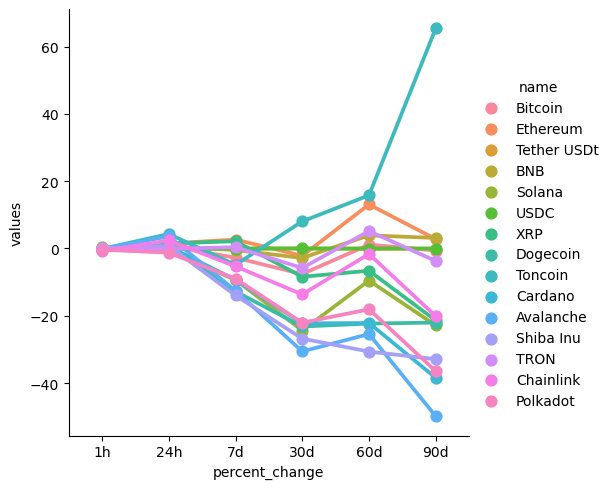

In [35]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [37]:
df7 = df[['name','quote.USD.price','timestamp']]
df7 = df7.query("name == 'Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,65609.68466,2024-06-20 14:49:51.610308
0,Bitcoin,65609.68466,2024-06-20 14:50:03.635339
0,Bitcoin,65621.77715,2024-06-20 14:51:04.063113
0,Bitcoin,65621.00220,2024-06-20 14:52:04.878402
0,Bitcoin,65621.00220,2024-06-20 14:53:05.244690
0,Bitcoin,65629.89003,2024-06-20 14:54:05.610043


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/9y/k93jl00x4sn898p4xrl2dvs80000gn/T/ipykernel_23321/3624572052.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


[Text(19894.618055555555, 0, '14:50:00'),
 Text(19894.618402777778, 0, '14:50:30'),
 Text(19894.61875, 0, '14:51:00'),
 Text(19894.61909722222, 0, '14:51:30'),
 Text(19894.619444444445, 0, '14:52:00'),
 Text(19894.619791666668, 0, '14:52:30'),
 Text(19894.620138888888, 0, '14:53:00'),
 Text(19894.62048611111, 0, '14:53:30'),
 Text(19894.620833333334, 0, '14:54:00')]

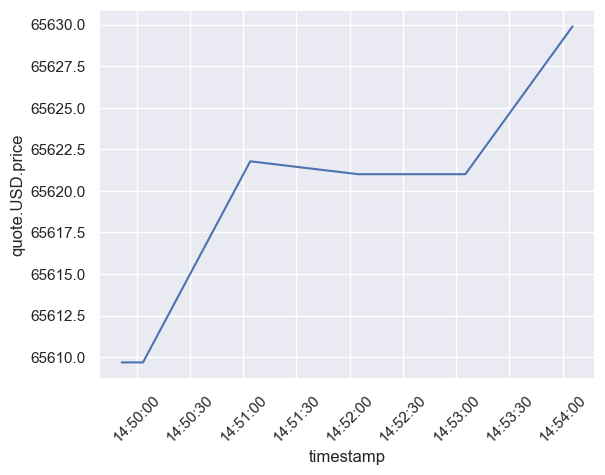

In [39]:
sns.set_theme(style="darkgrid")

axes = sns.lineplot(x='timestamp', y='quote.USD.price', data = df7)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45)